<a href="https://colab.research.google.com/github/pedropvsn/Oncase/blob/main/Oncase_Q2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas que normalmente são utilizadas em ciencia de dados
import statsmodels.api as sm
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **BASES DE DADOS**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_treino = pd.read_csv("/content/drive/My Drive/Colab/Oncase q2c/regression_train.csv",  sep=',', decimal=".")

df_treino.head(5)

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [5]:
df_treino.shape

(1042, 8)

In [6]:
df_treino.isnull().sum() #quantidade de nulos por coluna

target    327
X1          0
X2         11
X3          0
X4          0
X5          0
X6          0
X7          0
dtype: int64

## Tratando valores nulos da base de treino

In [7]:
#  SUBSTITUIR OU EXCLUIR AS LINHAS QUE O TARGET ESTÁ COMO NaN, senão na célula de treinar o modelo dá erro. 
#como a base é pequena, melhor substituir

# substituindo nulos pela média 

df_treino['target'].fillna(df_treino['target'].mean(), inplace=True)

df_treino['X2'].fillna(df_treino['X2'].mean(), inplace=True)




In [ ]:
df_treino.isnull().sum() #quantidade de nulos por coluna

target    0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
dtype: int64

In [9]:
df_teste = pd.read_csv("/content/drive/My Drive/Colab/Oncase q2c/regression_test.csv",  sep=',', decimal=".")
df_teste.head(5)

,target,X1,X2,X3,X4,X5,X6,X7
0,3.436244,0.210854,-2.451307,51.239996,4.641751,-67.874319,5,-5.760571
1,1525.839412,2.157483,4.337776,43.828794,8.070219,-68.405526,8,10.193773
2,455.600191,5.166359,-0.452615,43.931305,1.349625,-66.240021,0,-1.063645
3,0.619759,3.276641,-3.607201,50.631046,2.473542,-69.971690,8,-8.476921
4,10.996472,-1.867485,-2.408863,58.660224,2.826219,-53.647149,5,-5.660827


In [10]:
df_teste.isnull().sum() #quantidade de nulos por coluna

target    81
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
dtype: int64

## Tratando valores nulos da base de teste

In [11]:

# substituindo nulos pela média 

df_teste['target'].fillna(df_teste['target'].mean(), inplace=True)


In [33]:
df_teste.isnull().sum() #quantidade de nulos por coluna

target    0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
dtype: int64

# REGRESSÃO LINEAR

Fontes: [Regressão Linear com Sklearn: Conceito e Aplicação](https://medium.com/@lamartine_sl/regress%C3%A3o-linear-com-sklearn-modelo-de-previs%C3%A3o-de-custos-com-plano-de-sa%C3%BAde-5e963e590f4c)


[Modelo com statsmodels](https://joaogbsczip.medium.com/regress%C3%A3o-linear-com-scikit-learn-582390c7ce1b)

## Modelo com o statsmodels

Em nosso caso, já percebemos que de fato não há relação linear entre as variáveis, a correlação é bastante baixa.

E agora, será que nosso modelo irá obter os melhores parâmetros possíveis? Em primeiro momento, criaremos um modelo utilizando a biblioteca statsmodels, essa biblioteca não é muito utilizada no mundo de ML pois é mais voltada à estatística, mas para a construção de modelos para ML, acaba sendo usada principalmente para obter valores de testes de hipóteses por exemplo, o que a sk-learn não nos provê inicialmente.

Após esse primeiro modelo, poderemos por exemplo, observar quais variáveis não possuem significância alguma para predizer o valor de y (variável dependente), apesar de que existem várias técnicas de feature selection específicas para isso.

Conforme apresentado em sua documentação, statsmodels é uma biblioteca escrita em Python que provê diversas classes e métodos para a grande maioria de modelos e testes estatísticos.

Utilizaremos o seu método OLS, que advém de Ordinary Least Squares, passando as nossas variáveis X e y (variáveis independentes e dependente, respectivamente) treinaremos o modelo e, após o treinamento, será utilizado o método summary para verificar as estatísticas do mesmo.

In [12]:

# Separando os dados transformados em X e y

X_sm = df_treino.drop(['target'], axis = 1)

y_sm = df_treino.target

In [13]:
X_sm.head(5)

,X1,X2,X3,X4,X5,X6,X7
0,-0.546168,-0.460781,47.063305,1.611370,-65.882137,0,-16.672865
1,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [14]:
y_sm.head(5)

0    1349.940229
1      47.735389
2    1349.940229
3     908.202209
4    1640.461863
Name: target, dtype: float64

In [15]:
# Adicionando coeficiente as variáveis independentes
X_sm = sm.add_constant(X_sm)
X_sm.head(5)

,const,X1,X2,X3,X4,X5,X6,X7
0,1.0,-0.546168,-0.460781,47.063305,1.611370,-65.882137,0,-16.672865
1,1.0,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,1.0,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,1.0,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1.0,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [16]:
# Treinando o modelo
model_sm = sm.OLS(y_sm, X_sm).fit()


# Visualizando as estatística do modelo treinado
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     73.93
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           9.28e-87
Time:                        18:52:00   Log-Likelihood:                -8753.4
No. Observations:                1042   AIC:                         1.752e+04
Df Residuals:                    1034   BIC:                         1.756e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1012.5677    259.399      3.904      0.000     503.560    1521.576
X1            37.2658     12.742      2.925      0.004      12.262      62.270
X2           155.2508     20.963      7.406      0.000     114.116     196.386
X3             0.1560      1.079      0.145      0.885      -1.962       2.274
X4            -8.9796     13.225     -0.679      0.497     -34.931      16.971
X5            -4.3851      3.720     -1.179      0.239     -11.685       2.915
X6            10.7073     10.272      1.042      0.297      -9.449      30.864
X7             0.4281      8.248      0.052      0.959     -15.758      16.614
==============================================================================
Omnibus:                      314.523   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1026.206
Skew:                           1.468   Prob(JB):                    1.45e-223
Kurtosis:                       6.875   Cond. No.                         670.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo com Sklearn

**O que será abordado:** 

1 - O que é Regressão?

2 - Análise Exploratória dos Dados

3 - Modelo de Regressão Linear

4 - Performance do Modelo

## 1- Modelo de regressão linear (o que é)

Basicamente, o que o algoritmo de regressão linear faz é ajustar várias linhas nos pontos de dados e retornar a linha que resulta no menor erro. Tudo isso em uma equação matemática.

Para representar a relação entre uma variável dependente (y) e uma variável independente (x), usamos o modelo:

y=a+bx

Onde:

Y = Alvo

a = Intercepto

b = Inclinação da reta

x = variável independente

Em casos em que existam mais de duas variáveis, este conceito pode ser estendido, temos assim a regressão linear múltipla. Por exemplo, considere um cenário em que você deve prever o preço da casa com base em sua área, número de quartos, renda média das pessoas na área, idade da casa e assim por diante. Nesse caso, a variável dependente (variável de destino) depende de várias variáveis independentes.

## 2 - Análise exploratória de dados

feita em outro notebook.

## 3 - Análise de correlação

A primeira coisa que vamos verificar é a correlação entre as variáveis.
O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. 

Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

In [17]:
#matriz de correlação
corr = df_treino.corr()
corr

,target,X1,X2,X3,X4,X5,X6,X7
target,1.000000,0.378873,0.571169,0.006167,-0.008957,-0.020438,0.033007,0.534023
X1,0.378873,1.000000,0.556527,0.025361,-0.029827,0.042807,-0.022386,0.540101
X2,0.571169,0.556527,1.000000,0.004966,0.018835,0.010511,0.014123,0.928539
X3,0.006167,0.025361,0.004966,1.000000,0.008004,-0.003092,-0.093812,0.043176
X4,-0.008957,-0.029827,0.018835,0.008004,1.000000,-0.059369,-0.022158,0.012061
X5,-0.020438,0.042807,0.010511,-0.003092,-0.059369,1.000000,-0.027672,0.003798
X6,0.033007,-0.022386,0.014123,-0.093812,-0.022158,-0.027672,1.000000,0.037851
X7,0.534023,0.540101,0.928539,0.043176,0.012061,0.003798,0.037851,1.000000


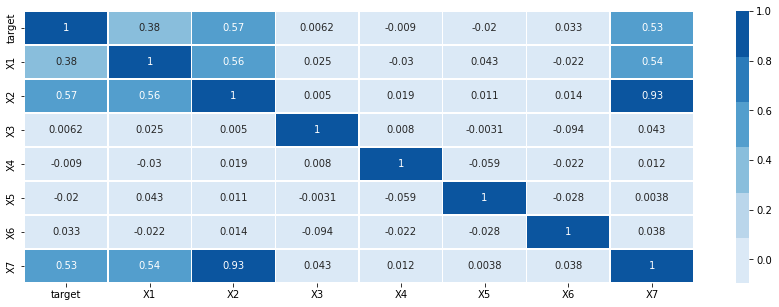

In [18]:
#Vamos ver a correlação graficamente

f, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(corr, cmap = sns.color_palette("Blues"), linewidths=.5, annot=True);

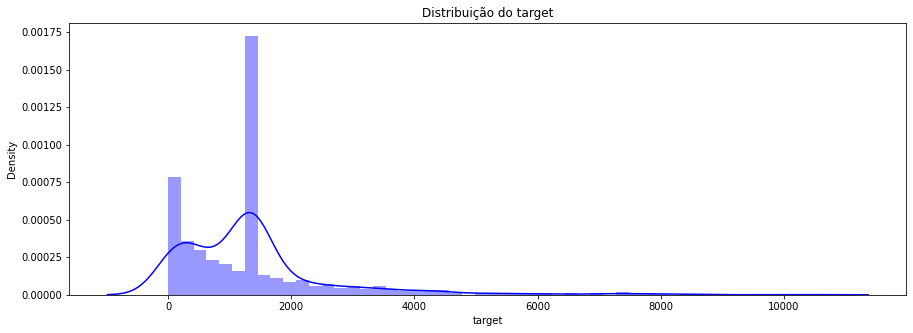

In [19]:
#Distribuição do target

plt.figure(figsize=(15,5))
plt.title("Distribuição do target")
ax = sns.distplot(df_treino["target"], color = 'b')


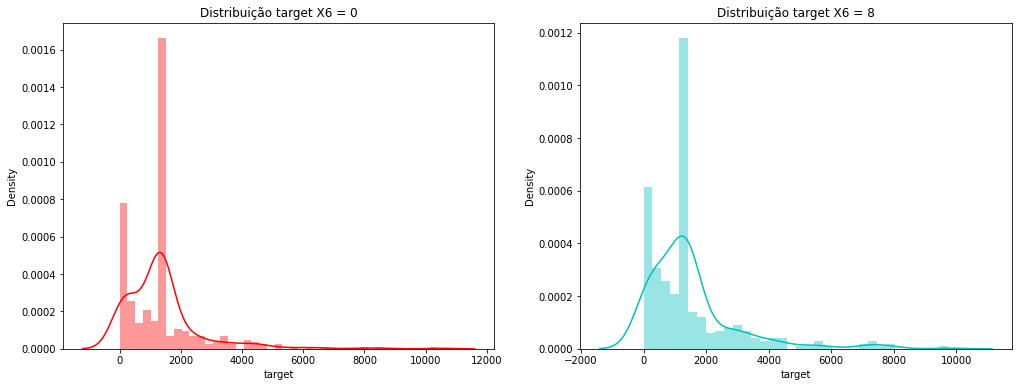

In [20]:
#Distruição de proeficiencia por X6


fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.distplot(df_treino[(df_treino.X6 == 0)]["target"],color='r',ax=ax)
ax.set_title('Distribuição target X6 = 0');

ax=fig.add_subplot(122)
sns.distplot(df_treino[(df_treino.X6 == 8)]['target'],color='c',ax=ax)
ax.set_title('Distribuição target X6 = 8');

Agora usaremos uma função da biblioteca scikit-learn que é a train_test_split, esta função separa nossos dados entre treino e teste de forma aleatória, sendo treinado com uma parte dos dados e testados com a outra.

Usaremos 80% dos dados para treino e 20% para teste, esta divisão é feita através da feature test_size=0.2


In [21]:

# X matriz com as variaveis 
# Y vetor com as respostas

X_train = df_treino.drop(['target'], axis = 1)
y_train = df_treino.target

X_test = df_teste.drop(['target'], axis = 1)
y_test = df_teste.target


In [22]:
X_train

,X1,X2,X3,X4,X5,X6,X7
0,-0.546168,-0.460781,47.063305,1.611370,-65.882137,0,-16.672865
1,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680
...,...,...,...,...,...,...,...
1037,5.375810,6.937947,55.810467,1.698025,-65.819509,8,16.304176
1038,0.619207,-1.925819,48.168606,1.357223,-65.385243,8,-4.525675
1039,4.548172,2.886253,47.775525,1.278439,-56.312543,8,6.782694
1040,1.806045,-3.015213,48.352707,4.627906,-57.722688,5,-7.085751


In [23]:
# Treinando o modelo com os conjuntos de treino

lin_reg = LinearRegression()

model = lin_reg.fit(X_train, y_train)


In [24]:
#Verificando o resultado

r2_train = model.score(X_train, y_train)

r2_test = model.score(X_test, y_test)

print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

# nao funcinou o de teste pq tem valores nulos na base

R2 no set de treino: 0.33
R2 no set de teste: 0.25


In [25]:
# Gerando as previsões

y_pred = model.predict(X_test)

# Obtendo os resíduos
residuals = y_test - y_pred



R² = 0.2483156335378619


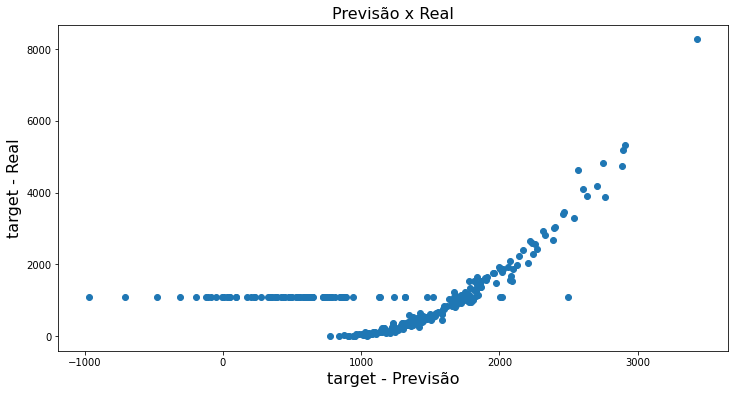

In [26]:
# Plotando o valor previsto x valor real, a relação entre os dois deve ser linear
# Para isso utilizaremos a biblioteca matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.scatter(y_pred, y_test)
ax.figure.set_size_inches(12, 6)
plt.title('Previsão x Real', fontdict={'fontsize': 16})
plt.xlabel('target - Previsão', fontdict={'fontsize': 16})
plt.ylabel('target - Real', fontdict={'fontsize': 16})
ax

# Importando o módulo metrics para as avaliações do modelo
import sklearn.metrics as metrics
# Mostrando o valor do R²
print('R² =', metrics.r2_score(y_true=y_test, y_pred=y_pred)) # nao funcinou o de teste pq tem valores nulos na base

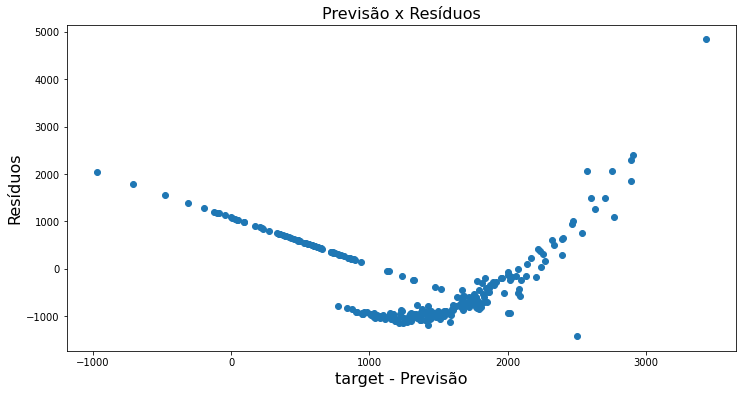

In [27]:
ax = plt.scatter(x=y_pred, y=residuals)
ax.figure.set_size_inches(12, 6)
plt.title('Previsão x Resíduos', fontdict={'fontsize': 16})
plt.xlabel('target - Previsão', fontdict={'fontsize': 16})
plt.ylabel('Resíduos', fontdict={'fontsize': 16})
ax

## 4 - Performance do Modelo


Nesta etapa, que será a última, avaliaremos o modelo de regressão e explicar os conceitos de avaliação.

Primeiro, vamos olhar o Intercepto e os Coeficientes da Regressão.

In [28]:
print('Intercepto:', model.intercept_)

Intercepto: 1012.5677199538995


In [29]:
coeff_df = pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficient'])
coeff_df


,Coefficient
X1,37.265795
X2,155.250817
X3,0.156002
X4,-8.979599
X5,-4.385056
X6,10.707320
X7,0.428105


O Intercepto representa o valor de b0 da equação da regressão linear.

 O valor do intercepto é a previsão do modelo quando o valor de X é zero.

O Coeficiente, neste caso, os coeficientes representam os “pesos” das variáveis nos modelos, neste caso, na equação os identificamos como os b1, b2, b3…bn.

Com as informações dos “pesos” da sua regressão você pode avaliar quais variáveis afetam o seu modelo, podendo assim aumentar sua eficácia. Outra forma de verificar isso é através o teste de p-valor.

 meu exemplo foi: O significado de cada valor é previsão da adição de cada valor dos coeficientes quando o valor de x é aumentado em um. Exemplo, Quando X aumenta em 1 é adicionado o valor de 4.007274 no coeficiente da REGIÃO sobre o valor a ser previsto.

**Olhando para os Erros**

Uma forma de saber a performance da Regressão Linear é olharmos para nossos erros! Pois é errando que se aprende.

Para isso a biblioteca sklearn nos oferece uma função muito útil que resultado na impressão das principais métricas: MAE, MSE e RMSE. 

Vamos olhar os valores dessas métricas aplicadas ao modelo e depois discutiremos mais.

- **Mean Absolute Error (MAE)** é a média do valor absoluto dos erros.

- **Erro Quadrático Médio (MSE)** é a média dos erros quadráticos

- **Erro médio quadrático da raiz (RMSE)** é a raiz quadrada da média dos erros quadráticos


In [30]:
y_pred = model.predict(X_test)



In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 782.2334033611826
MSE: 827255.6670894623
RMSE: 909.5359625047612


Com o MAE podemos ver que nosso algoritmo erra a PROEFICIENCIA_MEDIA em 31.85 pontos.

O RMSE têm o benefício em penalizar os erros de maior magnitude. Esta métrica pode não descrever sozinha o erro médio. Mas a diferença das métricas pode auxiliar no diagnóstico de predições muito ruins ou outliers. Se o RMSE ficar muito maior que MAE então esta suposição deve ser verificada. É o que acontece com o modelo :(

  
Neste caso teríamos que avaliar quais variáveis penalizam nosso modelo, exclui-las ou transforma-las em combinação com outras variáveis. Além de verificar se há outliers ou se possuímos poucos dados para o modelo.

**Precisamos da regressão para responder se e como um fenômeno influencia o outro ou como várias variáveis ​​estão relacionadas. A regressão também é útil quando você deseja prever uma resposta usando um novo conjunto de preditores.**

## Abordagem mais rápida: 

In [32]:
from sklearn.datasets import load_boston # para carregar os dados
from sklearn.linear_model import LinearRegression # importa o modelo
from sklearn.model_selection import train_test_split

# carrega os dados
# X matriz com as variaveis 
# Y vetor com as respostas

X_train = df_treino.drop(['target'], axis = 1)
y_train = df_treino.target

X_test = df_teste.drop(['target'], axis = 1)
y_test = df_teste.target

regr = LinearRegression()
regr.fit(X_train, y_train)

r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.33
R2 no set de teste: 0.25
